# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [110]:
!pip install plotly

     ---------------------------------------- 15.2/15.2 MB 3.9 MB/s eta 0:00:00


In [112]:
!pip install wordcloud

     -------------------------------------- 152.9/152.9 kB 3.0 MB/s eta 0:00:00


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

C:\Users\talib\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\talib\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\talib\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


This code scrapes data from the website https://www.airlinequality.com/airline-reviews/british-airways/ using the Python libraries requests and BeautifulSoup. It iterates through the first 34 pages of reviews for British Airways, and extracts the date, review text, country of origin, and rating for each review. The data is stored in the Python lists created earlier.

In [3]:
# Creating an empty list of date cx travelled on, reviews they provided, country they belong to and rating that have given.
date = []
reviews = []
country = []
ratings = []
for i in range(1, 35):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
            
    for item in soup.find_all("time"):
        date.append(item.text)
        
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))
        
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            ratings.append(item.span.text)
        except:
            ratings.append("None")

In [4]:
print('Total number of entries in reviws : ', len(reviews))
print('Total number of entries in ratings : ',len(ratings))
print('Total number of entries in date : ',len(date))
print('Total number of entries in country : ',len(country))

Total number of entries in reviws :  3400
Total number of entries in ratings :  3434
Total number of entries in date :  3400
Total number of entries in country :  3400


In [5]:
# This code truncates the ratings list to the first 3400 items.
ratings = ratings[:3400]

In [6]:
# This code creates a Pandas DataFrame called df with four columns (reviews, ratings, date, and country) 
# and fills it with the corresponding information scraped from the website.
df = pd.DataFrame({"reviews":reviews,"ratings": ratings, "date":date, "country": country})

In [7]:
df

,reviews,ratings,date,country
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom
1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain
2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom
3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom
4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom
...,...,...,...,...
3395,Boeing 777. One of our best flights from Europ...,1,1st June 2014,United States
3396,Tampa-Gatwick. Check in lousy. I can't believe...,5,1st June 2014,United Kingdom
3397,A long time user of BA I have seen a gradual d...,9,1st June 2014,United Kingdom
3398,LHR-Warsaw. Economy on an A320. Plane seemed b...,10,1st June 2014,United Kingdom


In [8]:
df.shape

(3400, 4)

In [9]:
# This code saves the df DataFrame as a CSV file called BA_reviews.csv.
cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

    So far we have noticed that we have appx 3435 ratings out of which top 3400 were taken to match the rows of others. Out of all the customers 434 customer did not leave any review, they have just left the ratings.

# DATA CLEANING

In [10]:
# This code creates a new column in the df DataFrame called verified that is True if the corresponding review text contains the string "Trip Verified" and False otherwise.
df['verified'] = df.reviews.str.contains("Trip Verified")
df

,reviews,ratings,date,country,verified
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom,True
1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain,True
2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom,True
3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom,True
4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom,True
...,...,...,...,...,...
3395,Boeing 777. One of our best flights from Europ...,1,1st June 2014,United States,False
3396,Tampa-Gatwick. Check in lousy. I can't believe...,5,1st June 2014,United Kingdom,False
3397,A long time user of BA I have seen a gradual d...,9,1st June 2014,United Kingdom,False
3398,LHR-Warsaw. Economy on an A320. Plane seemed b...,10,1st June 2014,United Kingdom,False


This code block is importing the necessary libraries for lemmatization, namely the Natural Language Toolkit (nltk), WordNetLemmatizer, and stopwords. It then initializes an instance of WordNetLemmatizer called "lemma" to use for lemmatizing words.

The next line downloads the WordNet database from nltk, which is used by the WordNetLemmatizer to lemmatize words. This line only needs to be run once, so subsequent runs can be commented out or removed.

The last line is taking the "reviews" column from a Pandas dataframe called "df", and using the strip() method to remove the string "✅ Trip Verified |" from the beginning of each review in the column. The stripped reviews are then stored in a new variable called "striped_reviews". The purpose of this is to remove any non-essential information from the reviews that may cause noise in the analysis.





In [11]:
#for lemmatization of words we will use nltk library
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
nltk.download('wordnet')


striped_reviews = df.reviews.str.strip("✅ Trip Verified |")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\talib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
striped_reviews

0       BA 242 on the 6/2/23. Boarding was delayed due...
1       Not only my first flight in 17 years, but also...
2       My husband and myself were flying to Madrid on...
3       Organised boarding process. Really friendly cr...
4       Outward journey BA245 London to Buenos Aires C...
                              ...                        
3395    Boeing 777. One of our best flights from Europ...
3396    ampa-Gatwick. Check in lousy. I can't believe ...
3397    A long time user of BA I have seen a gradual d...
3398    LHR-Warsaw. Economy on an A320. Plane seemed b...
3399    Gatwick to Malaga late May. I have travelled t...
Name: reviews, Length: 3400, dtype: object

In [13]:
clean_reviews =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for review in striped_reviews:
    review = re.sub('[^a-zA-Z]',' ', review)
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    clean_reviews.append(review)

In [14]:
df['clean_reviews'] = clean_reviews
df

,reviews,ratings,date,country,verified,clean_reviews
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,7th February 2023,United Kingdom,True,ba boarding delayed due late arrival incoming ...
1,✅ Trip Verified | Not only my first flight in...,9,6th February 2023,Spain,True,first flight year also first time back england...
2,✅ Trip Verified | My husband and myself were ...,10,4th February 2023,United Kingdom,True,husband flying madrid rd february legal matter...
3,✅ Trip Verified | Organised boarding process. ...,10,31st January 2023,United Kingdom,True,organised boarding process really friendly cre...
4,✅ Trip Verified | Outward journey BA245 Londo...,10,31st January 2023,United Kingdom,True,outward journey ba london buenos aire club wor...
...,...,...,...,...,...,...
3395,Boeing 777. One of our best flights from Europ...,1,1st June 2014,United States,False,boeing one best flight europe everything done ...
3396,Tampa-Gatwick. Check in lousy. I can't believe...,5,1st June 2014,United Kingdom,False,ampa gatwick check lousy believe writing check...
3397,A long time user of BA I have seen a gradual d...,9,1st June 2014,United Kingdom,False,long time user ba seen gradual decline quality...
3398,LHR-Warsaw. Economy on an A320. Plane seemed b...,10,1st June 2014,United Kingdom,False,lhr warsaw economy plane seemed brand new seat...


In [15]:
df.describe()

,reviews,ratings,date,country,verified,clean_reviews
count,3400,3400,3400,3400,3400,3400
unique,3395,12,1639,69,2,3395
top,Cabin crew polite unfortunately BA ran out of ...,1,19th January 2015,United Kingdom,False,cabin crew polite unfortunately ba ran chicken...
freq,2,741,26,2156,2417,2


In [16]:
df.ratings.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '9', '10', '2', '4', '3', '1',
       '5', '8', '6', '7', 'None'], dtype=object)

In [17]:
df.ratings.value_counts()


1                                741
2                                383
3                                380
8                                343
10                               301
7                                295
9                                291
4                                231
5                                218
6                                177
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     34
None                               6
Name: ratings, dtype: int64

In [18]:
df.ratings = df.ratings.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
df.drop(df[df.ratings == "None"].index, axis=0, inplace=True)
df.describe()

,reviews,ratings,date,country,verified,clean_reviews
count,3394,3394,3394,3394,3394,3394
unique,3389,10,1639,69,2,3389
top,British Airways from Tampa to Gatwick on Boein...,1,19th January 2015,United Kingdom,False,british airway tampa gatwick boeing club world...
freq,2,741,26,2152,2411,2


In [19]:
df.isnull().sum()

reviews          0
ratings          0
date             0
country          0
verified         0
clean_reviews    0
dtype: int64

In [20]:
 df.ratings.mean()

inf

Text(0.5, 0.98, 'Counts for each ratings')

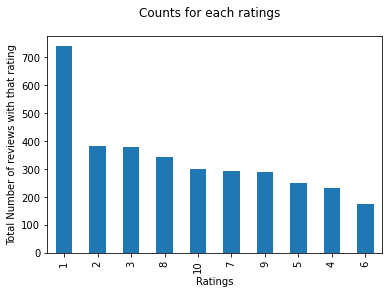

In [21]:
df.ratings.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

## OBSERVATION 
### We have seen that most number of customers has given 1 star rating

The below code creates a dataframe of count and percentage of ratings, renames columns, and plots a bar chart of the ratings counts with percentage labels.

In [22]:
df_ratings = pd.DataFrame(df.ratings.value_counts())
pct_values = (df_ratings.ratings.values/ df_ratings.ratings.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [23]:
df_ratings = df_ratings.reset_index()

In [24]:
df_ratings.rename(columns={'index':'Stars', 'ratings':'total_counts'}, inplace=True)
df_ratings

,Stars,total_counts,pct_values
0,1,741,21.83
1,2,383,11.28
2,3,380,11.20
3,8,343,10.11
4,10,301,8.87
5,7,295,8.69
6,9,291,8.57
7,5,252,7.42
8,4,231,6.81
9,6,177,5.22


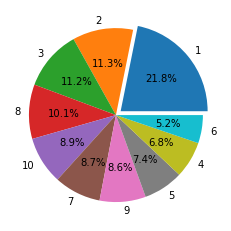

In [123]:
    
fig, ax = plt.subplots()

ax.pie(df_ratings.pct_values, labels = df_ratings.Stars, explode = (0.07, 0, 0,0,0,0,0,0,0,0), autopct='%1.1f%%', shadow=False)
# Set the color of the pie chart to white
for text in ax.texts:
    text.set_color('Black')


Text(0.5, 1.0, 'Counts for each ratings')

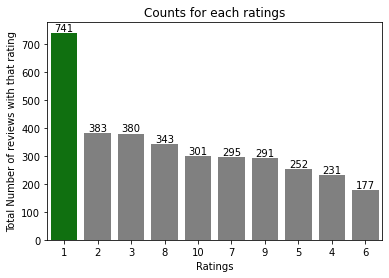

In [28]:
clrs = ['Green' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

## OBSERVATION
Overall, the table shows that the largest proportion of reviews have a rating of 1 (21.83%), followed by ratings of 2 and 3, which each account for just over 11% of the reviews. The ratings of 8 and 10 also have a sizable number of reviews, with 10.11% and 8.87%, respectively. Ratings of 4, 5, 6, and 7 each account for a smaller percentage of reviews, with between 5% and 7.42% of reviews in each category.

In [29]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


In [103]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review

,index,country
0,United Kingdom,2152
1,United States,359
2,Australia,146
3,Canada,104
4,Germany,59


In [31]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)


Text(0.5, 1.0, 'Maximum number of review by country')

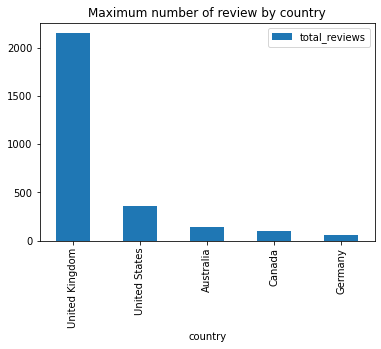

In [32]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

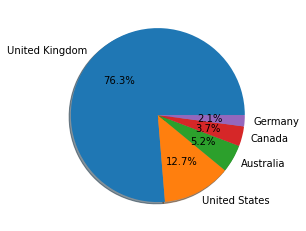

In [122]:

    
fig, ax = plt.subplots()
ax.pie(df_country_review.country, labels=df_country_review['index'], autopct='%1.1f%%', shadow=True)

# Set the color of the pie chart to white
for text in ax.texts:
    text.set_color('Black')


## OBSERVATION
We can see that we have received most number of reviews from the United Kingdom as British airways is the UK based airline

In [60]:
df.date = pd.to_datetime(df.date)

In [50]:
df2=df.groupby(["country"])["ratings"]


In [88]:
fig = px.line(df, x='date', y="ratings")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## OBSERVATION
We have noticed that the reviews starts decreasing in number from March 2020 when COVID starts and we came to this conclusion that the reason for the same is corona travel ban by the government across the globe. 

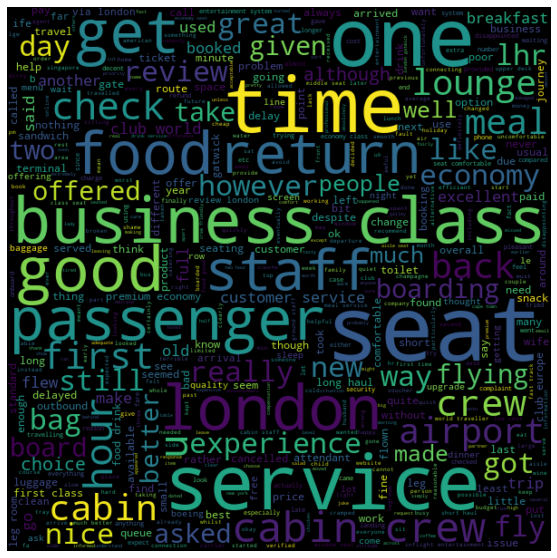

In [65]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.clean_reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## OBSERVATION
This is the word cloud from the reviews which shows the most occured words from the reviews.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

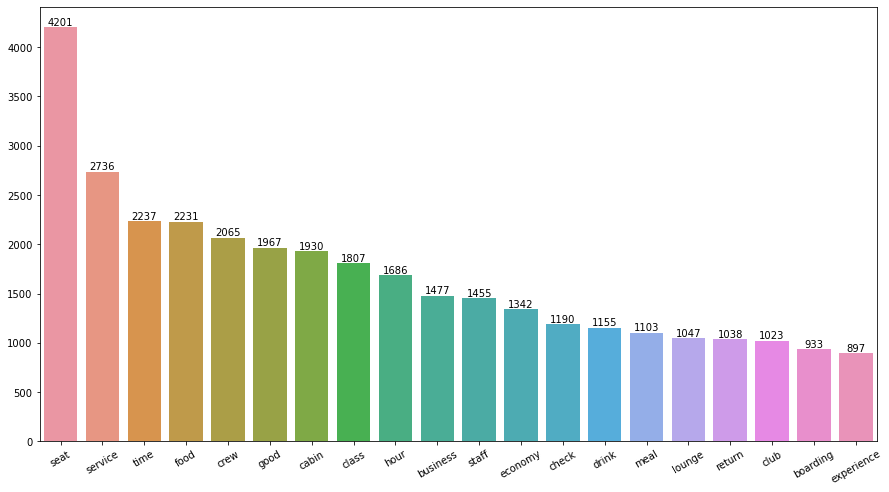

In [67]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

## OBSERVATIONS
The following graph shows the most discussed topics from the data which helps us to know that the customers has most talked about seats, service, time, and food. 

In [72]:
!pip install vaderSentiment


     ------------------------------------ 126.0/126.0 kB 826.5 kB/s eta 0:00:00


The code uses the Natural Language Toolkit (nltk) library to perform text analysis. It first downloads necessary components including the punkt tokenizer for sentence splitting, stopwords for removing irrelevant words, and wordnet for lemmatization.

In [87]:
import nltk


nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\talib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\talib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


It defines a function to lemmatize words using the WordNetLemmatizer from the nltk.stem package. This function takes in a list of words and their parts of speech and returns the lemmatized sentence. It applies this function to a column of text data in a pandas dataframe and creates a new column with the lemmatized text.

In [79]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,ratings,date,country,verified,clean_reviews,polarity,POS tagged,Lemma
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,5,2023-02-07,United Kingdom,True,ba boarding delayed due late arrival incoming ...,0.468750,"[(ba, n), (boarding, v), (delayed, n), (due, a...",ba board delayed due late arrival incoming f...
1,✅ Trip Verified | Not only my first flight in...,9,2023-02-06,Spain,True,first flight year also first time back england...,0.211944,"[(first, r), (flight, n), (year, n), (also, r)...",first flight year also first time back engla...
2,✅ Trip Verified | My husband and myself were ...,10,2023-02-04,United Kingdom,True,husband flying madrid rd february legal matter...,0.131250,"[(husband, n), (flying, v), (madrid, a), (rd, ...",husband fly madrid rd february legal matter ...
3,✅ Trip Verified | Organised boarding process. ...,10,2023-01-31,United Kingdom,True,organised boarding process really friendly cre...,0.627083,"[(organised, a), (boarding, n), (process, n), ...",organised boarding process really friendly c...
4,✅ Trip Verified | Outward journey BA245 Londo...,10,2023-01-31,United Kingdom,True,outward journey ba london buenos aire club wor...,0.012879,"[(outward, r), (journey, n), (ba, n), (london,...",outward journey ba london buenos aire club w...


In [80]:
df[['reviews','Lemma']]


,reviews,Lemma
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,ba board delayed due late arrival incoming f...
1,✅ Trip Verified | Not only my first flight in...,first flight year also first time back engla...
2,✅ Trip Verified | My husband and myself were ...,husband fly madrid rd february legal matter ...
3,✅ Trip Verified | Organised boarding process. ...,organised boarding process really friendly c...
4,✅ Trip Verified | Outward journey BA245 Londo...,outward journey ba london buenos aire club w...
...,...,...
3395,Boeing 777. One of our best flights from Europ...,boeing one best flight europe everything do ...
3396,Tampa-Gatwick. Check in lousy. I can't believe...,ampa gatwick check lousy believe write check...
3397,A long time user of BA I have seen a gradual d...,long time user ba see gradual decline qualit...
3398,LHR-Warsaw. Economy on an A320. Plane seemed b...,lhr warsaw economy plane seem brand new seat...


It imports the SentimentIntensityAnalyzer from the vaderSentiment package to perform sentiment analysis on the lemmatized text. It defines a function that takes in a sentence and returns the compound score for the sentiment analysis. The function applies this function to the lemmatized column in the pandas dataframe and creates a new column with the compound score.


The code then defines another function that maps the compound score to one of three sentiment categories: positive, negative, or neutral. It applies this function to the compound score column in the pandas dataframe and creates a new column with the sentiment category.

In [81]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,ratings,date,country,verified,clean_reviews,polarity,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,5,2023-02-07,United Kingdom,True,ba boarding delayed due late arrival incoming ...,0.468750,"[(ba, n), (boarding, v), (delayed, n), (due, a...",ba board delayed due late arrival incoming f...,0.9524,Positive
1,✅ Trip Verified | Not only my first flight in...,9,2023-02-06,Spain,True,first flight year also first time back england...,0.211944,"[(first, r), (flight, n), (year, n), (also, r)...",first flight year also first time back engla...,0.9869,Positive
2,✅ Trip Verified | My husband and myself were ...,10,2023-02-04,United Kingdom,True,husband flying madrid rd february legal matter...,0.131250,"[(husband, n), (flying, v), (madrid, a), (rd, ...",husband fly madrid rd february legal matter ...,0.9791,Positive
3,✅ Trip Verified | Organised boarding process. ...,10,2023-01-31,United Kingdom,True,organised boarding process really friendly cre...,0.627083,"[(organised, a), (boarding, n), (process, n), ...",organised boarding process really friendly c...,0.9371,Positive
4,✅ Trip Verified | Outward journey BA245 Londo...,10,2023-01-31,United Kingdom,True,outward journey ba london buenos aire club wor...,0.012879,"[(outward, r), (journey, n), (ba, n), (london,...",outward journey ba london buenos aire club w...,-0.1119,Negative


In [82]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1991
Negative    1032
Neutral      371
Name: Analysis, dtype: int64

It creates a pie chart to visualize the sentiment analysis results. The pie chart shows the counts of positive, negative, and neutral sentiment categories in the data.

<Figure size 1080x504 with 0 Axes>

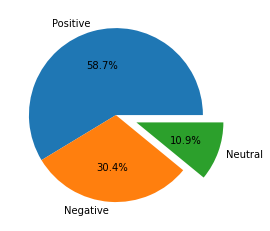

In [121]:
plt.figure(figsize=(15,7))



fig, ax = plt.subplots()

ax.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# Set the color of the pie chart to white
for text in ax.texts:
    text.set_color('Black')

## OBSERVATION
We have observed that 58.7%(1991) of the reviews were positive, 30.4%(1032) of the reviews were negative and 10.9%(371) were neutral.